In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [208]:
df

0      AC 1      AC 2      AC 3      AC 4      AC 5  \
0      2019-08-01 00:00:00  7.518632  8.788315  0.000000  0.000000  2.617045   
1      2019-08-01 00:01:00       NaN       NaN       NaN       NaN       NaN   
2      2019-08-01 00:02:00  7.426114  8.940615  0.000000  0.000000  2.581625   
3      2019-08-01 00:03:00       NaN       NaN       NaN       NaN       NaN   
4      2019-08-01 00:04:00  7.052986  9.161103  0.000000  0.000000  2.592095   
...                    ...       ...       ...       ...       ...       ...   
87835  2019-09-30 23:55:00  0.000000  6.122385  2.192198  2.083315  1.046250   
87836  2019-09-30 23:56:00       NaN       NaN       NaN       NaN       NaN   
87837  2019-09-30 23:57:00  1.209176  6.152532  2.211421  0.000000  1.448103   
87838  2019-09-30 23:58:00       NaN       NaN       NaN       NaN       NaN   
87839  2019-09-30 23:59:00  1.430442  6.078281  1.891162  0.000000  1.577491   

           AC 6      AC 7      AC 8      AC 9     AC 10     AC 11     AC 12  \
0      4.079041  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373   
1           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2      3.781231  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730   
3           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4      3.800127  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409   
...         ...       ...       ...       ...       ...       ...       ...   
87835  0.000000  3.668421  3.006311  3.614301  1.860847  5.019769  3.154221   
87836       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
87837  0.000000  3.151248  2.871690  3.417942  2.185493  5.174168  2.772349   
87838       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
87839  4.364239  3.126339  3.287224  3.986978  2.013912  4.821829  3.363855   

          AC 13     AC 14     AC 15     AC 16     AC 17     AC 18  
0      3.142941  2.749470  5.417774  4.113460  3.305072  6.735981  
1           NaN       NaN       NaN       NaN       NaN       NaN  
2      3.085110  2.720484  3.302422  3.986483  3.220588  6.379500  
3           NaN       NaN       NaN       NaN       NaN       NaN  
4      3.132799  2.676861  3.539026  3.797881  3.131560  6.363475  
...         ...       ...       ...       ...       ...       ...  
87835  3.648026  2.439526  4.062719  1.854352  3.027539  7.259989  
87836       NaN       NaN       NaN       NaN       NaN       NaN  
87837  3.786657  2.060023  4.057525  1.870886  2.991946  7.134647  
87838       NaN       NaN       NaN       NaN       NaN       NaN  
87839  3.380110  1.949240  4.026304  1.862166  3.009434  7.179719  

[87840 rows x 19 columns]

In [209]:
df1 = df.dropna()

In [210]:
df1.head()

0      AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
0  2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
2  2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0  2.581625  3.781231   
4  2019-08-01 00:04:00  7.052986  9.161103   0.0   0.0  2.592095  3.800127   
6  2019-08-01 00:06:00  6.665446  9.065626   0.0   0.0  2.575639  3.772891   
8  2019-08-01 00:08:00  6.674838  9.096130   0.0   0.0  2.021472  3.155697   

       AC 7      AC 8      AC 9     AC 10     AC 11     AC 12     AC 13  \
0  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373  3.142941   
2  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730  3.085110   
4  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409  3.132799   
6  2.596200  5.805132  3.553778  1.878356  2.737645  2.510972  3.090007   
8  2.845417  6.315060  3.042244  1.914650  2.452500  2.171791  3.097202   

      AC 14     AC 15     AC 16     AC 17     AC 18  
0  2.749470  5.417774  4.113460  3.305072  6.735981  
2  2.720484  3.302422  3.986483  3.220588  6.379500  
4  2.676861  3.539026  3.797881  3.131560  6.363475  
6  2.666604  4.607439  3.062610  3.063953  6.127366  
8  2.710572  5.332696  2.640150  2.864680  5.662474

In [211]:
df1['dates']=df1['0']

<ipython-input-211-c0e22e2dd852>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dates']=df1['0']


In [212]:
df1['dates']=pd.to_datetime(df1['dates'], format='%Y-%m-%d')
df1.set_index('dates',inplace=True)

<ipython-input-212-473d7ef3aaef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dates']=pd.to_datetime(df1['dates'], format='%Y-%m-%d')


In [213]:
df1.head()

0      AC 1      AC 2  AC 3  AC 4  \
dates                                                                      
2019-08-01 00:00:00  2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0   
2019-08-01 00:02:00  2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0   
2019-08-01 00:04:00  2019-08-01 00:04:00  7.052986  9.161103   0.0   0.0   
2019-08-01 00:06:00  2019-08-01 00:06:00  6.665446  9.065626   0.0   0.0   
2019-08-01 00:08:00  2019-08-01 00:08:00  6.674838  9.096130   0.0   0.0   

                         AC 5      AC 6      AC 7      AC 8      AC 9  \
dates                                                                   
2019-08-01 00:00:00  2.617045  4.079041  2.782276  4.624447  5.222060   
2019-08-01 00:02:00  2.581625  3.781231  2.529366  5.057423  5.349465   
2019-08-01 00:04:00  2.592095  3.800127  2.332304  6.322521  3.995392   
2019-08-01 00:06:00  2.575639  3.772891  2.596200  5.805132  3.553778   
2019-08-01 00:08:00  2.021472  3.155697  2.845417  6.315060  3.042244   

                        AC 10     AC 11     AC 12     AC 13     AC 14  \
dates                                                                   
2019-08-01 00:00:00  2.151238  1.585072  0.560373  3.142941  2.749470   
2019-08-01 00:02:00  2.414715  2.168184  1.818730  3.085110  2.720484   
2019-08-01 00:04:00  2.237114  3.345624  2.310409  3.132799  2.676861   
2019-08-01 00:06:00  1.878356  2.737645  2.510972  3.090007  2.666604   
2019-08-01 00:08:00  1.914650  2.452500  2.171791  3.097202  2.710572   

                        AC 15     AC 16     AC 17     AC 18  
dates                                                        
2019-08-01 00:00:00  5.417774  4.113460  3.305072  6.735981  
2019-08-01 00:02:00  3.302422  3.986483  3.220588  6.379500  
2019-08-01 00:04:00  3.539026  3.797881  3.131560  6.363475  
2019-08-01 00:06:00  4.607439  3.062610  3.063953  6.127366  
2019-08-01 00:08:00  5.332696  2.640150  2.864680  5.662474

In [214]:
df1=df1.drop(columns='0',axis = 1)

In [215]:
df1.head()

AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
dates                                                                     
2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0  2.581625  3.781231   
2019-08-01 00:04:00  7.052986  9.161103   0.0   0.0  2.592095  3.800127   
2019-08-01 00:06:00  6.665446  9.065626   0.0   0.0  2.575639  3.772891   
2019-08-01 00:08:00  6.674838  9.096130   0.0   0.0  2.021472  3.155697   

                         AC 7      AC 8      AC 9     AC 10     AC 11  \
dates                                                                   
2019-08-01 00:00:00  2.782276  4.624447  5.222060  2.151238  1.585072   
2019-08-01 00:02:00  2.529366  5.057423  5.349465  2.414715  2.168184   
2019-08-01 00:04:00  2.332304  6.322521  3.995392  2.237114  3.345624   
2019-08-01 00:06:00  2.596200  5.805132  3.553778  1.878356  2.737645   
2019-08-01 00:08:00  2.845417  6.315060  3.042244  1.914650  2.452500   

                        AC 12     AC 13     AC 14     AC 15     AC 16  \
dates                                                                   
2019-08-01 00:00:00  0.560373  3.142941  2.749470  5.417774  4.113460   
2019-08-01 00:02:00  1.818730  3.085110  2.720484  3.302422  3.986483   
2019-08-01 00:04:00  2.310409  3.132799  2.676861  3.539026  3.797881   
2019-08-01 00:06:00  2.510972  3.090007  2.666604  4.607439  3.062610   
2019-08-01 00:08:00  2.171791  3.097202  2.710572  5.332696  2.640150   

                        AC 17     AC 18  
dates                                    
2019-08-01 00:00:00  3.305072  6.735981  
2019-08-01 00:02:00  3.220588  6.379500  
2019-08-01 00:04:00  3.131560  6.363475  
2019-08-01 00:06:00  3.063953  6.127366  
2019-08-01 00:08:00  2.864680  5.662474

In [216]:
df_day = df1.resample('D').sum()
df_hour = df1.resample('6H').sum()

In [217]:
df_hour #day is divided into 4 time period midnight-6am  6am-12noon 12noon-6pm 6pm-midnight

AC 1         AC 2        AC 3        AC 4  \
dates                                                                   
2019-08-01 00:00:00  1225.001201  1412.604005  329.203025  354.738981   
2019-08-01 06:00:00   574.117602  1232.150142  312.345572  390.384124   
2019-08-01 12:00:00   539.899144  1236.473582  435.509380  702.402705   
2019-08-01 18:00:00   718.977581  1178.771782  516.889764  878.238926   
2019-08-02 00:00:00  1349.801873  1341.314125  614.693862  848.857598   
...                          ...          ...         ...         ...   
2019-09-29 18:00:00   143.481016   334.290522  389.184267  243.762574   
2019-09-30 00:00:00   199.045417   309.005922  468.219801  256.390953   
2019-09-30 06:00:00   260.677422   305.843182  359.689048  235.032646   
2019-09-30 12:00:00   250.884128   603.949768  487.604756  369.871779   
2019-09-30 18:00:00   401.058212  1132.880558  465.631629  259.042801   

                           AC 5        AC 6        AC 7        AC 8  \
dates                                                                 
2019-08-01 00:00:00  360.409559  762.821937  494.781705  713.974006   
2019-08-01 06:00:00  253.316246  500.119022  452.608305  502.371496   
2019-08-01 12:00:00  177.292637  180.749782  338.153817  649.079326   
2019-08-01 18:00:00  229.157506  541.673573  546.453982  436.781297   
2019-08-02 00:00:00  276.553190  673.487809  562.983772  523.687990   
...                         ...         ...         ...         ...   
2019-09-29 18:00:00  191.123152   63.853862  311.369322  313.403824   
2019-09-30 00:00:00  205.744315  176.026096  148.198359  412.491909   
2019-09-30 06:00:00  163.947812   86.012419  260.172439  268.492440   
2019-09-30 12:00:00  165.645021  159.543539  289.912464  376.951323   
2019-09-30 18:00:00  134.706440   71.583968  435.482342  498.375426   

                           AC 9       AC 10       AC 11       AC 12  \
dates                                                                 
2019-08-01 00:00:00  561.343474  471.450570  246.421452  335.907465   
2019-08-01 06:00:00  459.673123  274.453088  260.841610  324.510828   
2019-08-01 12:00:00  312.567235  191.091901  390.916963  607.341064   
2019-08-01 18:00:00  262.100973  307.341193  370.495922  511.416051   
2019-08-02 00:00:00  450.224145  402.781548  506.284677  622.057824   
...                         ...         ...         ...         ...   
2019-09-29 18:00:00  595.447981  303.752503  240.746781  334.772537   
2019-09-30 00:00:00  635.307971  299.370653  348.743072  452.824713   
2019-09-30 06:00:00  495.668717  182.109311  335.013994  392.696181   
2019-09-30 12:00:00  443.639446  177.641428  127.771473  366.904224   
2019-09-30 18:00:00  552.054245  194.631339  391.939400  426.591287   

                           AC 13       AC 14        AC 15       AC 16  \
dates                                                                   
2019-08-01 00:00:00   787.627665  873.683767   975.596967  854.334131   
2019-08-01 06:00:00   801.923311  410.387918   705.775973  555.536213   
2019-08-01 12:00:00   874.742453  343.063192   616.431722  394.566539   
2019-08-01 18:00:00   839.958527  539.304636   730.751055  757.007817   
2019-08-02 00:00:00  1201.266269  649.921530  1227.366926  903.791811   
...                          ...         ...          ...         ...   
2019-09-29 18:00:00   544.549062  353.977937   451.549585  293.846107   
2019-09-30 00:00:00   711.504675  549.022329   590.164150  398.868876   
2019-09-30 06:00:00   531.594944  384.445205   326.875924  344.553396   
2019-09-30 12:00:00   225.638866  396.873568   556.562762  313.782528   
2019-09-30 18:00:00   604.589980  360.947597   595.852447  263.875895   

                          AC 17        AC 18  
dates                                         
2019-08-01 00:00:00  610.230507   841.352930  
2019-08-01 06:00:00  852.294610  1618.795790  
2019-08-01 12:00:00  908.523549  1355.627623  
2019-08-01 18:00:00  897.595033  1501.443951 

# DAILY POWER ANALYSIS

<AxesSubplot:xlabel='dates'>

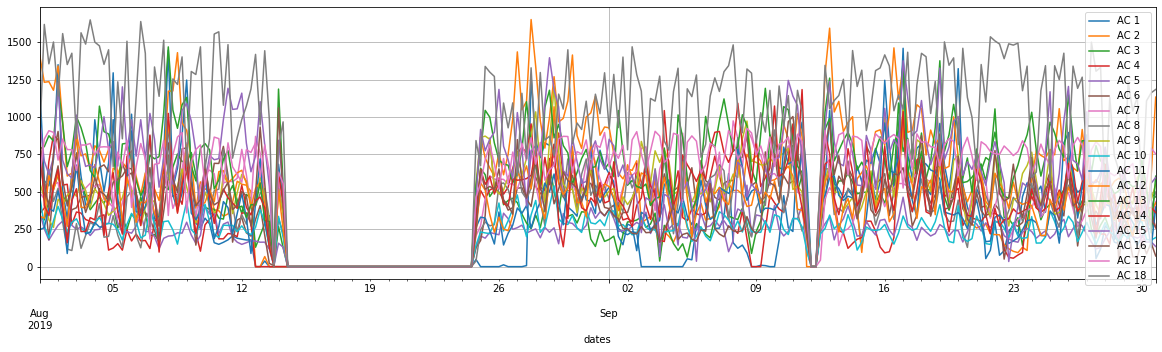

In [218]:
df_hour.plot(figsize = (20,5),grid =True) # first impression is that theres a sharp drop in power values from 11 aug till 26 aug

# TO VISUALIZE PERFORMANCES OF ALL AC.S USING SUBPLOTS

array([[<AxesSubplot:title={'center':'AC 1'}, xlabel='dates'>,
        <AxesSubplot:title={'center':'AC 2'}, xlabel='dates'>,
        <AxesSubplot:title={'center':'AC 3'}, xlabel='dates'>],
       [<AxesSubplot:title={'center':'AC 4'}, xlabel='dates'>,
        <AxesSubplot:title={'center':'AC 5'}, xlabel='dates'>,
        <AxesSubplot:title={'center':'AC 6'}, xlabel='dates'>],
       [<AxesSubplot:title={'center':'AC 7'}, xlabel='dates'>,
        <AxesSubplot:title={'center':'AC 8'}, xlabel='dates'>,
        <AxesSubplot:title={'center':'AC 9'}, xlabel='dates'>],
       [<AxesSubplot:title={'center':'AC 10'}, xlabel='dates'>,
        <AxesSubplot:title={'center':'AC 11'}, xlabel='dates'>,
        <AxesSubplot:title={'center':'AC 12'}, xlabel='dates'>],
       [<AxesSubplot:title={'center':'AC 13'}, xlabel='dates'>,
        <AxesSubplot:title={'center':'AC 14'}, xlabel='dates'>,
        <AxesSubplot:title={'center':'AC 15'}, xlabel='dates'>],
       [<AxesSubplot:title={'center':'AC 16'

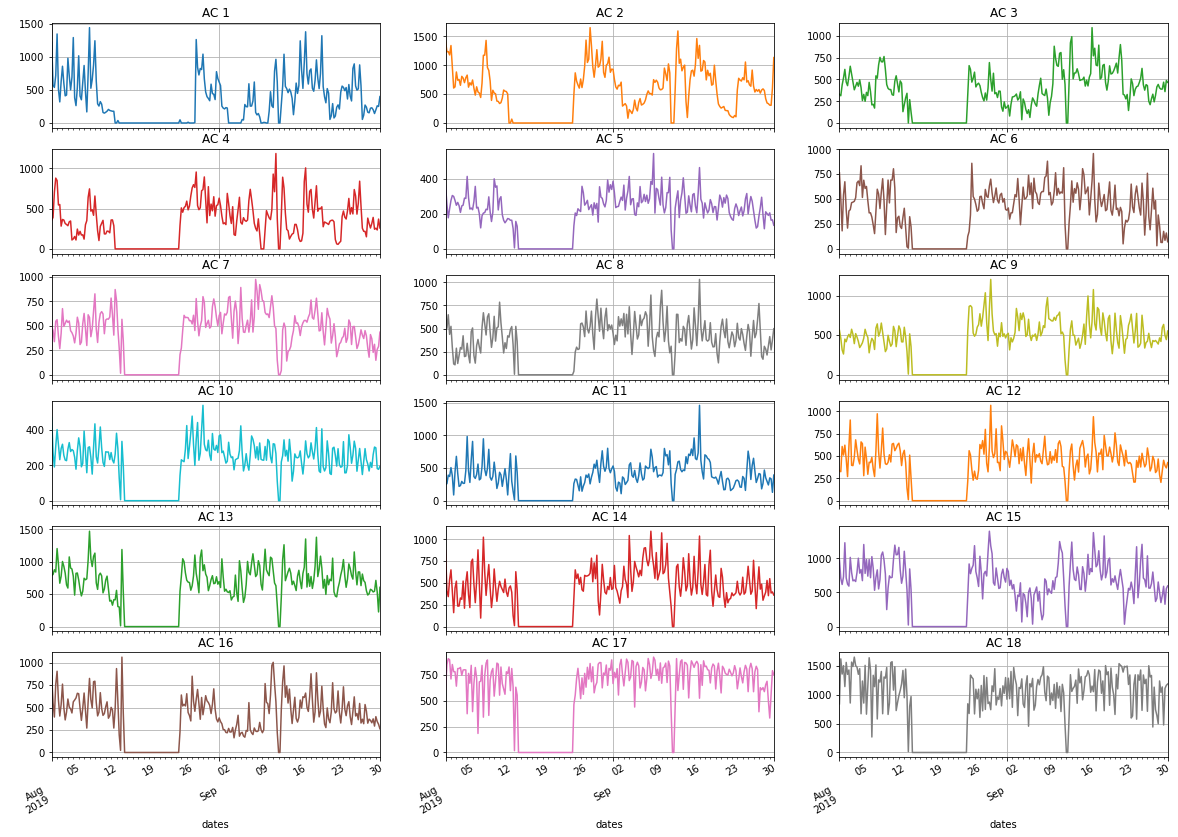

In [219]:
df_hour.plot(subplots=True, layout = (6,3),figsize = (20,15),grid = True,legend = False,title =['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9',
       'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16', 'AC 17',
       'AC 18'] )
   


(18.0, 0.0)

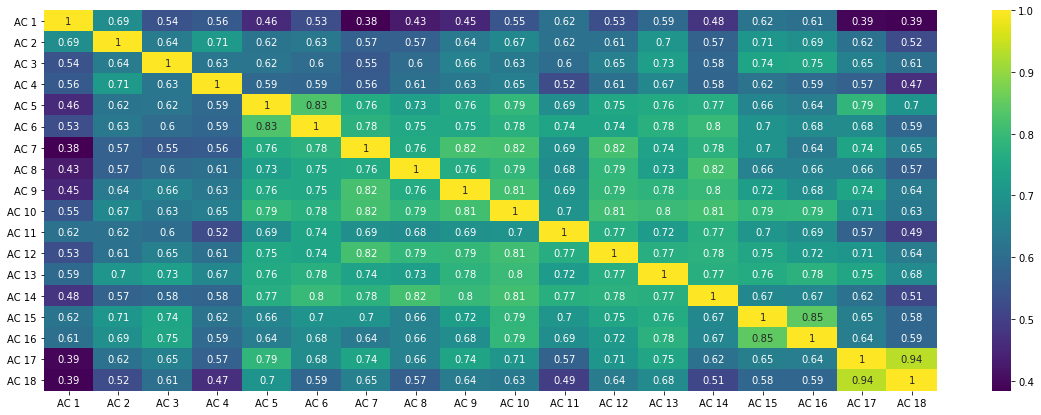

In [220]:
plt.figure(figsize=(20,7))
sns.heatmap(df_hour.corr(),annot=True,cmap='viridis')
plt.ylim(18, 0)

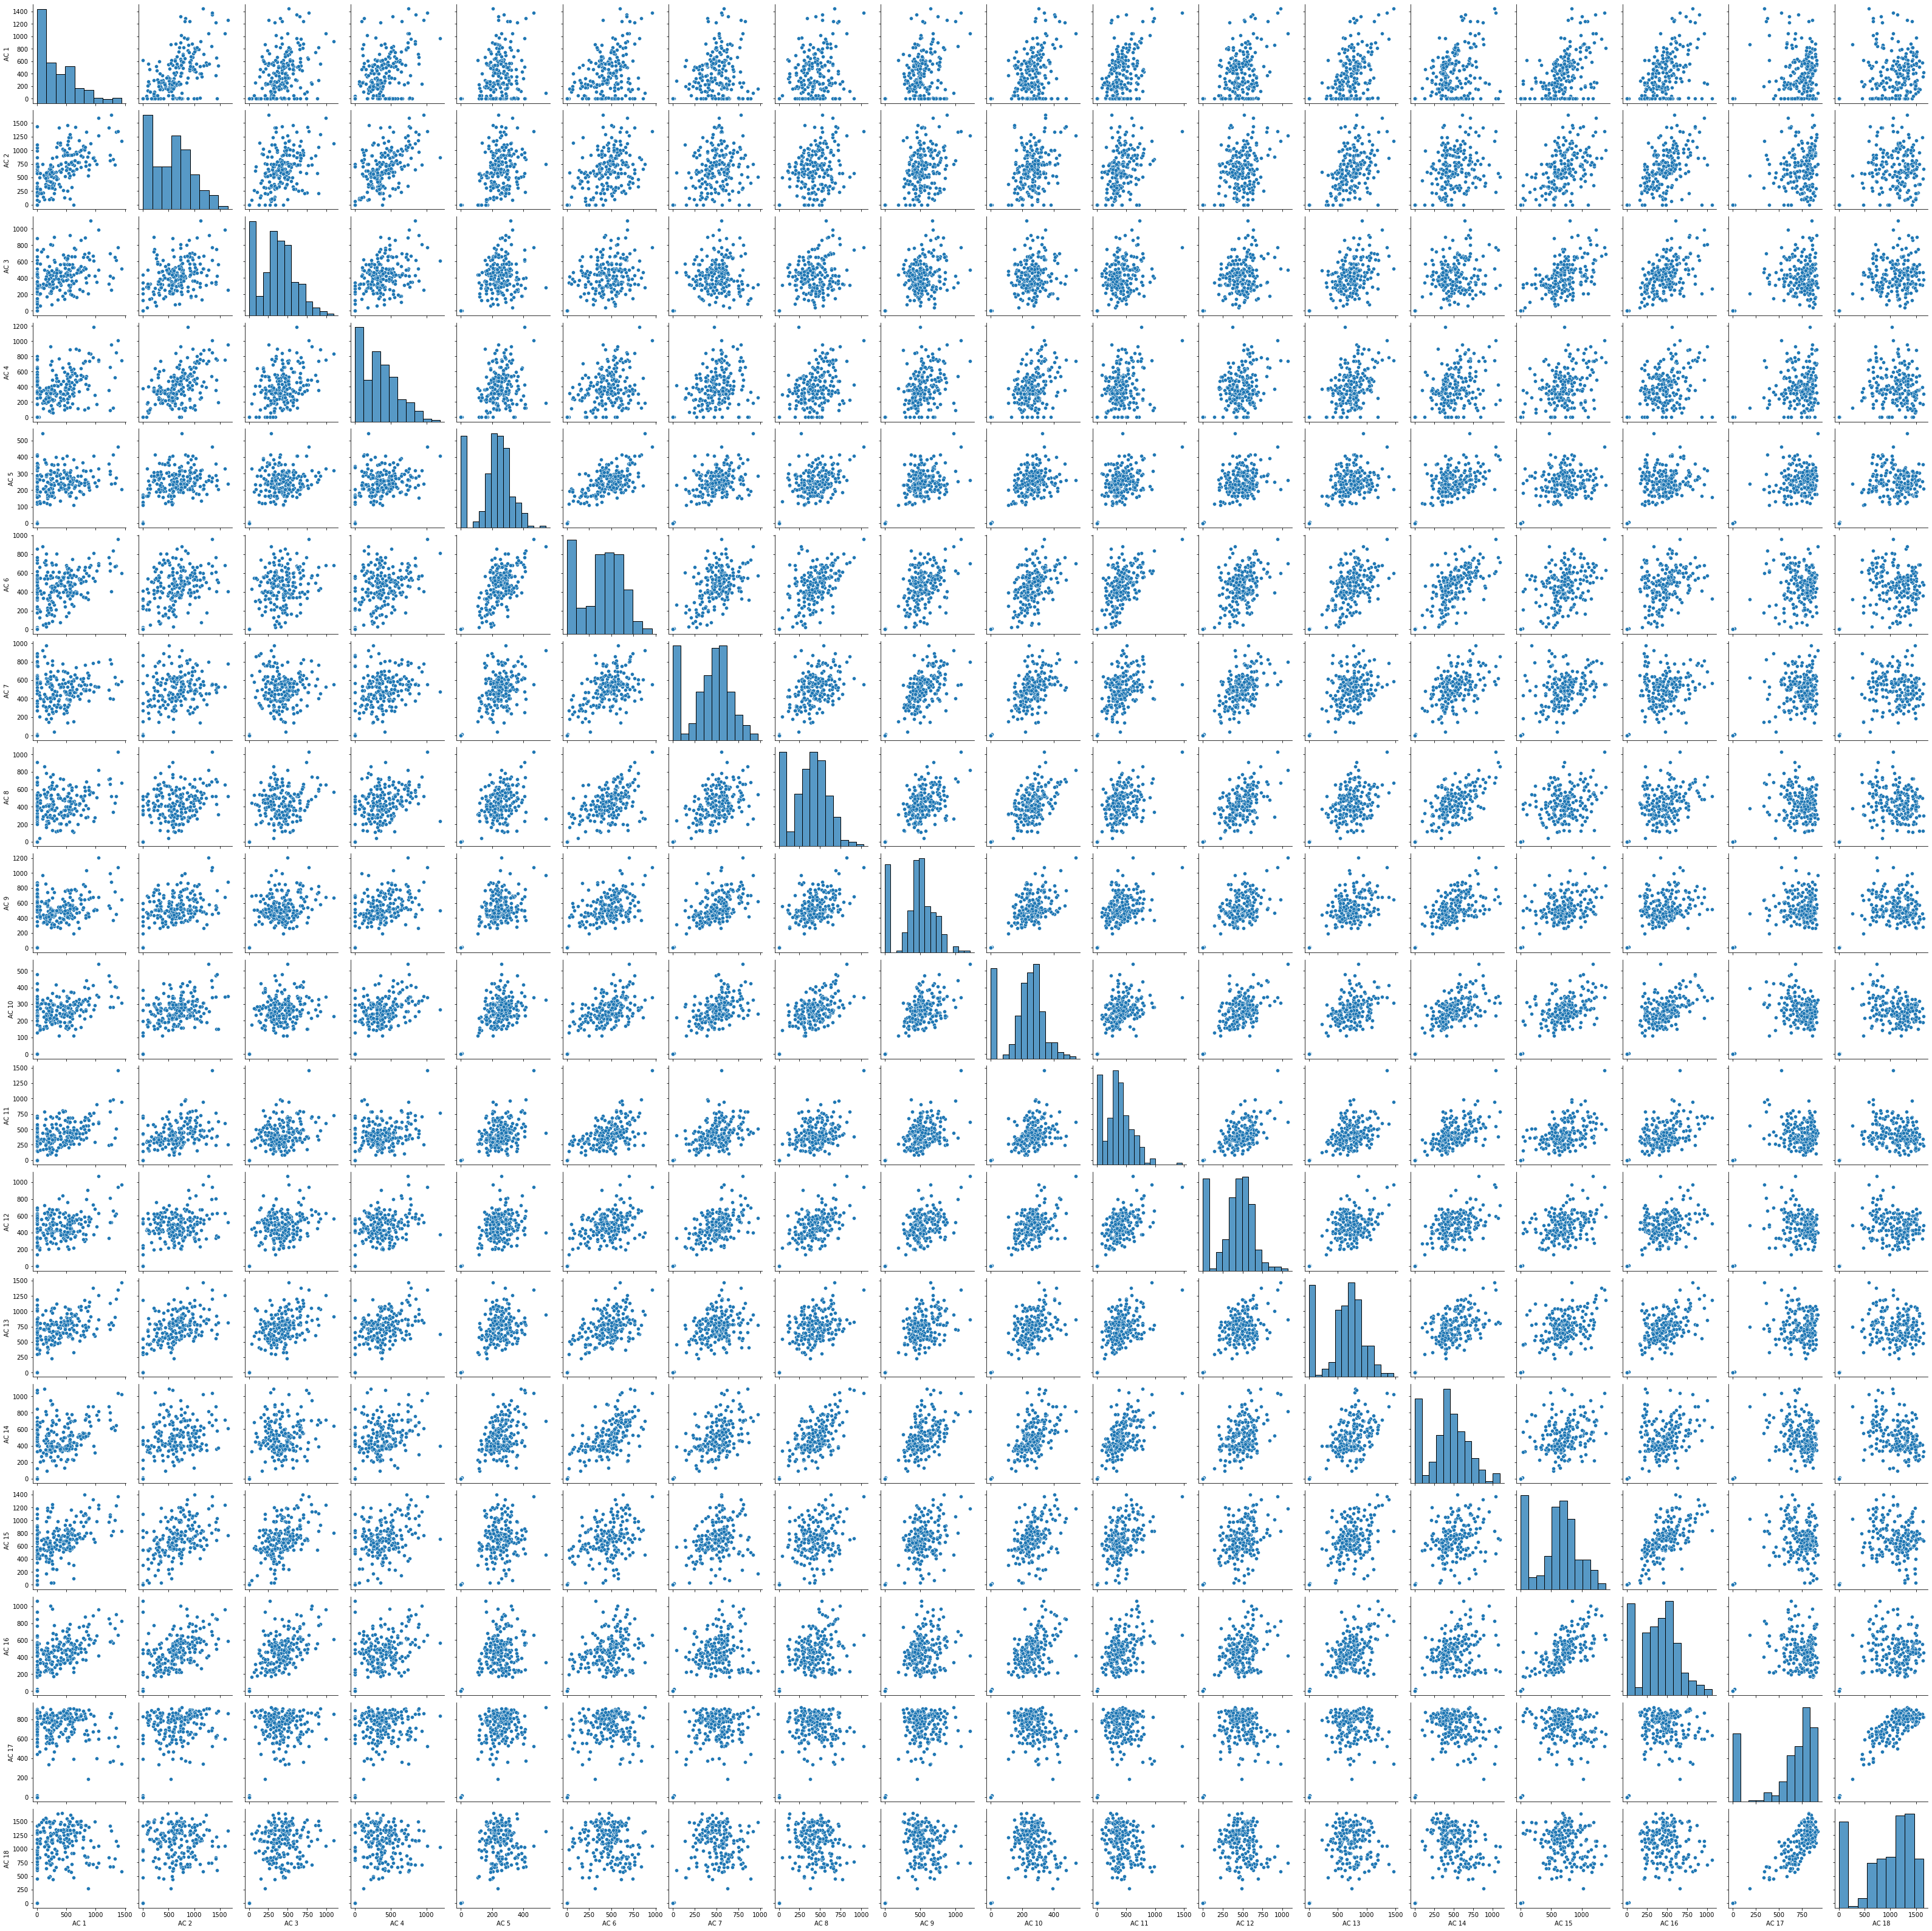

In [221]:
sns.pairplot(data = df_hour)

In [222]:
df_hour.to_csv('hourly',index = True)

In [314]:
gurgaon_temp = pd.read_excel('C://Users//DELL//OneDrive//Desktop//ML//TSA_FINAL/Data/gurgaon_temp.xlsx',index_col=0, parse_dates=True)

# Using online websites and extracting temp. table in MS excell using "get data command"

In [21]:
sum_power = df_hour.sum()
sum_power

AC 1      82936.044911
AC 2     134136.090605
AC 3      86767.765132
AC 4      80136.762231
AC 5      50800.569898
AC 6      93847.294549
AC 7     102025.387626
AC 8      88994.932128
AC 9     109119.503611
AC 10     53327.657137
AC 11     86125.618895
AC 12     97550.845176
AC 13    149411.074408
AC 14    102438.459866
AC 15    142868.332861
AC 16     95809.474174
AC 17    147405.838816
AC 18    223573.076079
dtype: float64

<AxesSubplot:>

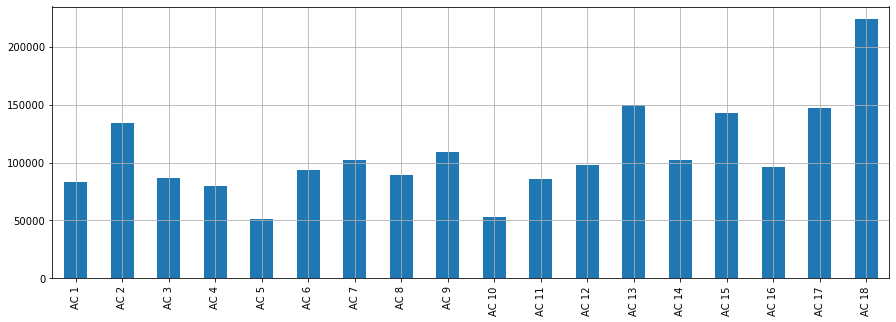

In [22]:
sum_power.plot.bar(figsize = (15,5),grid=True) 

# AC 18 WAS USED THE MOST AND AC 5 was Used the least

In [23]:
df_day.columns

Index(['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9',
       'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16', 'AC 17',
       'AC 18'],
      dtype='object')

# Testing for Stationarity

In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary") 

# In order to get future trends , hourly sum of power consumption by ACs is taken

In [26]:
df_sum_hourly = df_hour.sum(axis = 1) 

In [27]:
df_sum_hourly = pd.DataFrame(data = df_sum_hourly, columns=['power'])

In [28]:
gurgaon_temp

gurgaon  temp     public holidays  weekends
dates                                                           
2019-08-01 00:00:00               30                 0         0
2019-08-01 06:00:00               33                 0         0
2019-08-01 12:00:00               35                 0         0
2019-08-01 18:00:00               33                 0         0
2019-08-02 00:00:00               30                 0         0
...                              ...               ...       ...
2019-09-29 18:00:00               28                 0         1
2019-09-30 00:00:00               25                 0         0
2019-09-30 06:00:00               29                 0         0
2019-09-30 12:00:00               30                 0         0
2019-09-30 18:00:00               28                 0         0

[244 rows x 3 columns]

# Gurgaon temperature plot

<AxesSubplot:xlabel='dates', ylabel='TEMPERATURE IN CELSIUS'>

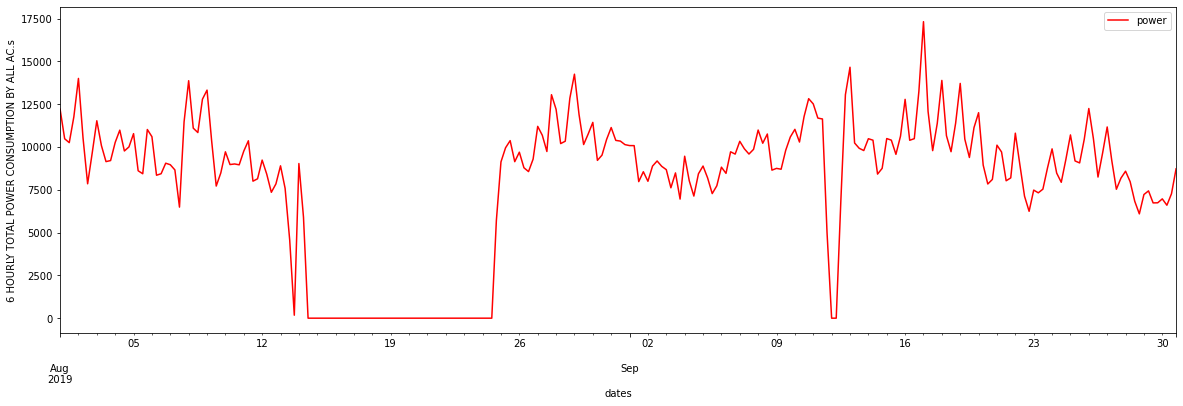

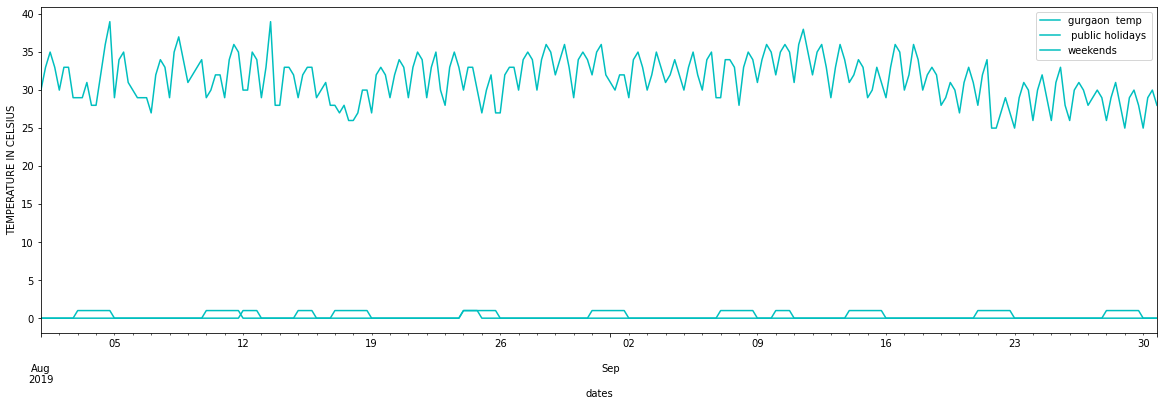

In [29]:

df_sum_hourly.plot(figsize = (20,6),color = 'r', ylabel = '6 HOURLY TOTAL POWER CONSUMPTION BY ALL AC.s')
gurgaon_temp.plot(color= 'c',figsize = (20,6), ylabel = 'TEMPERATURE IN CELSIUS')

In [30]:
temp_vs_power = df_sum_hourly.join(gurgaon_temp)


In [31]:
temp_vs_power

power  gurgaon  temp     public holidays  weekends
dates                                                                         
2019-08-01 00:00:00  12211.483349               30                 0         0
2019-08-01 06:00:00  10481.604974               33                 0         0
2019-08-01 12:00:00  10254.432613               35                 0         0
2019-08-01 18:00:00  11764.359570               33                 0         0
2019-08-02 00:00:00  14006.831428               30                 0         0
...                           ...              ...               ...       ...
2019-09-29 18:00:00   6740.658732               28                 0         1
2019-09-30 00:00:00   6970.059488               25                 0         0
2019-09-30 06:00:00   6598.281997               29                 0         0
2019-09-30 12:00:00   7267.353974               30                 0         0
2019-09-30 18:00:00   8726.632508               28                 0         0

[244 rows x 4 columns]

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(temp_vs_power)

StandardScaler()

In [72]:
scaled = scaler.transform(temp_vs_power)


In [73]:
df_scaled = pd.DataFrame(data = scaled, columns=['power','temperature','public holidays','weekends'])
df_scaled

power  temperature  public holidays  weekends
0    1.057617    -0.509180        -0.264906 -0.646997
1    0.633405     0.534853        -0.264906 -0.646997
2    0.577696     1.230876        -0.264906 -0.646997
3    0.947970     0.534853        -0.264906 -0.646997
4    1.497884    -0.509180        -0.264906 -0.646997
..        ...          ...              ...       ...
239 -0.283974    -1.205203        -0.264906  1.545603
240 -0.227719    -2.249236        -0.264906 -0.646997
241 -0.318889    -0.857191        -0.264906 -0.646997
242 -0.154815    -0.509180        -0.264906 -0.646997
243  0.203039    -1.205203        -0.264906 -0.646997

[244 rows x 4 columns]

<AxesSubplot:>

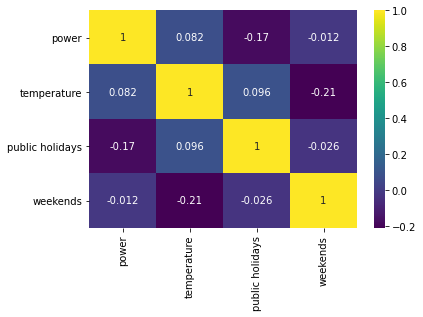

In [75]:
plt.figure()
sns.heatmap(df_scaled.corr(),annot=True,cmap='viridis')

# After scaling data and finding the correlation 
IT IS FOUND THAT TEMPERATURE HAS POSITIVE CORRELATION WITH POWER USAGE , BUT NOT THAT MUCH SINCE THE VALUE IS SOO SMALL.


# PAIRPLOT 
IT IS AGAIN SHOWING THE CORRELATION BETWEEN ALL THE ENTITIES

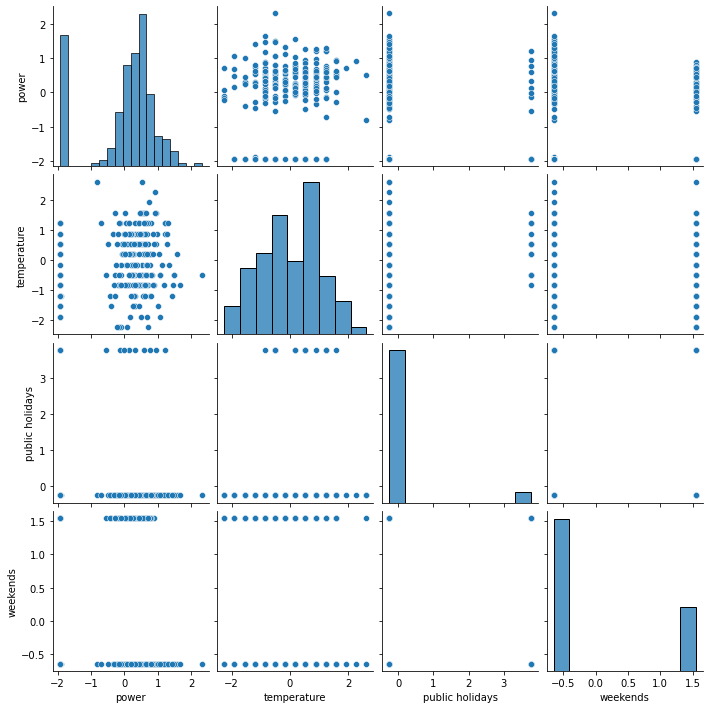

In [79]:
sns.pairplot(data  =df_scaled)

# Timeseries behaviour with weekend
IT CAN BE SEEN THAT MOST PEAKS IN THE USAGE COMES AT THE MIDDLE OF THE WEEK 

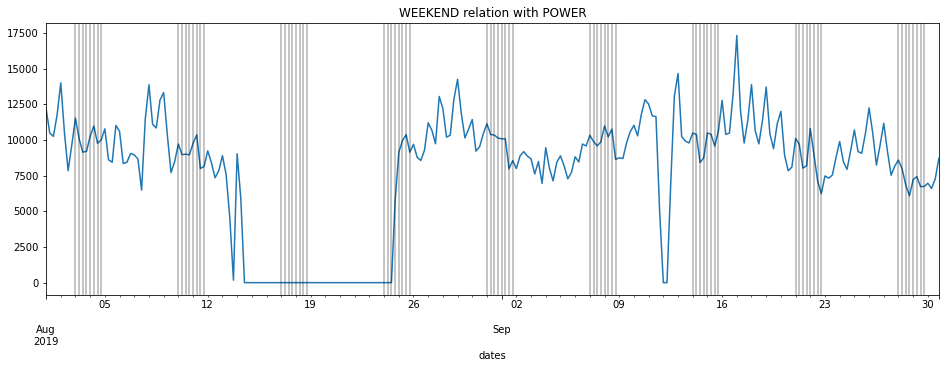

In [37]:
ax = temp_vs_power['power'].plot(figsize=(16,5),title='WEEKEND relation with POWER')
ax.autoscale(axis='x',tight=True)
for x in temp_vs_power.query('weekends==1').index:       # for days where holiday == 1
    ax.axvline(x=x, color='k', alpha = 0.3);  # add a semi-transparent grey line

# Forecasting
FORECASTING NEEDS A CONTINOUS DATA BUT SINCE IN AUG , THERE HAD BEEN ABRUPT GAP DENOTING NON USAGE OF AC,S. 
THIS INFORMATION WILL HAMPER OUR FORECAST SINCE IT NOT PROVIDING A MUCH INFO 
SO , TAKING TIMESERIES FROM 25TH OF AUGUST WILL A GOOD IDEA FOR BETTER PREDICTIONS

In [83]:
#SEASONAL DECOMPOSITION ON MODEL TO PLOT OUT ETS COMPONENTS
main  =     temp_vs_power['power'].loc['2019-08-25':]

<AxesSubplot:xlabel='dates'>

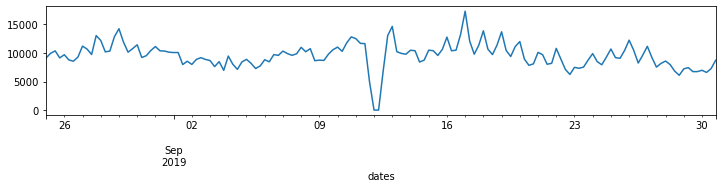

In [86]:
results = seasonal_decompose(main)
results.observed.plot(figsize = (12,2))


<AxesSubplot:xlabel='dates'>

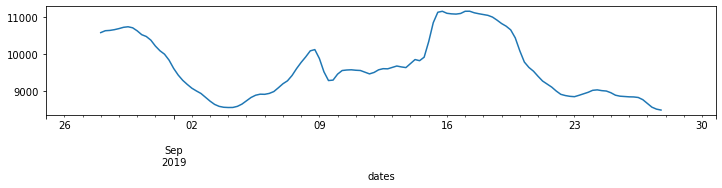

In [87]:
results.trend.plot(figsize=(12,2))

<AxesSubplot:xlabel='dates'>

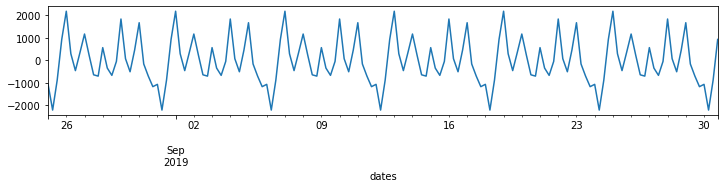

In [88]:
results.seasonal.plot(figsize=(12,2))

<AxesSubplot:xlabel='dates'>

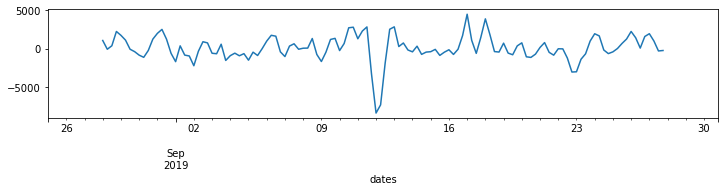

In [89]:
results.resid.plot(figsize=(12,2))

In [92]:
len(temp_vs_power)

244

# STATIONARITY TEST
FORECASTING NEEDS OUR TIME SERIES TO BE STATIONARY , HENCE AFTER USING adf_test() function 
ITS FOUND OUT THAT OUR DATA IS STATIONARY

In [237]:
adf_test(main) 

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.233879
p-value                   0.018105
# lags used               5.000000
# observations          142.000000
critical value (1%)      -3.477262
critical value (5%)      -2.882118
critical value (10%)     -2.577743
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [291]:
auto_arima(main).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  148
Model:               SARIMAX(5, 0, 4)   Log Likelihood               -1273.381
Date:                Tue, 06 Jul 2021   AIC                           2568.763
Time:                        18:34:24   BIC                           2601.732
Sample:                             0   HQIC                          2582.158
                                - 148                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2231.7109   3.77e+04      0.059      0.953   -7.18e+04    7.62e+04
ar.L1          0.4445      3.221      0.138      0.890      -5.868       6.757
ar.L2          0.1825      1.340      0.136      0.892      -2.444       2.809
ar.L3         -0.1183      0.408     -0.290      0.772      -0.919       0.682
ar.L4          0.6816      0.639      1.067      0.286      -0.570       1.933
ar.L5         -0.4244      1.603     -0.265      0.791      -3.566       2.717
ma.L1          0.6362      3.223      0.197      0.844      -5.680       6.952
ma.L2         -0.0833      4.803     -0.017      0.986      -9.498       9.331
ma.L3         -0.2799      3.722     -0.075      0.940      -7.574       7.014
ma.L4         -0.4881      2.023     -0.241      0.809      -4.454       3.478
sigma2      1.811e+06    580.069   3122.606      0.000    1.81e+06    1.81e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                84.63
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -0.58
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.53e+19. Standard errors may be unstable.
"""

In [301]:
len(main)

148

In [302]:
train= main.iloc[:104]  #  11 days on which we will test our predictions
test = main.iloc[104:]

In [304]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(main,order=(5,0,4))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  power   No. Observations:                  148
Model:               SARIMAX(5, 0, 4)   Log Likelihood               -1277.521
Date:                Tue, 06 Jul 2021   AIC                           2575.042
Time:                        18:35:57   BIC                           2605.015
Sample:                    08-25-2019   HQIC                          2587.220
                         - 09-30-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6047      0.188      3.217      0.001       0.236       0.973
ar.L2          0.2731      0.134      2.034      0.042       0.010       0.536
ar.L3         -0.0861      0.132     -0.651      0.515      -0.345       0.173
ar.L4          0.7258      0.137      5.309      0.000       0.458       0.994
ar.L5         -0.5176      0.127     -4.062      0.000      -0.767      -0.268
ma.L1          0.4997      0.209      2.386      0.017       0.089       0.910
ma.L2         -0.3265      0.157     -2.082      0.037      -0.634      -0.019
ma.L3         -0.4787      0.153     -3.128      0.002      -0.779      -0.179
ma.L4         -0.6340      0.146     -4.341      0.000      -0.920      -0.348
sigma2      1.886e+06   7.12e-08   2.65e+13      0.000    1.89e+06    1.89e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                86.88
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.60
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.65e+29. Standard errors may be unstable.
"""

In [305]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

<AxesSubplot:xlabel='dates'>

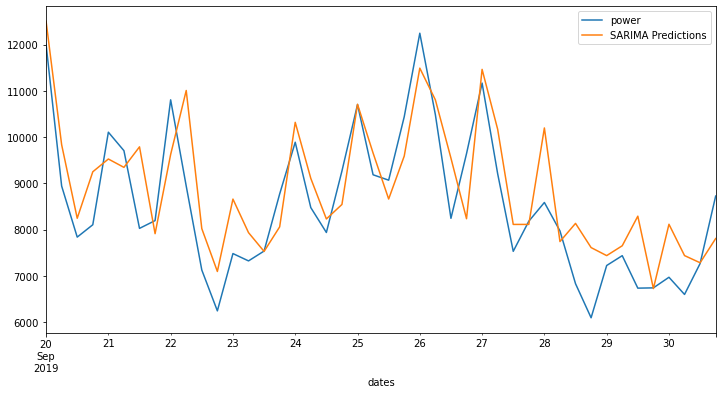

In [306]:
ax = test.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)


In [307]:
from statsmodels.tools.eval_measures import rmse
rmse(test,predictions)

900.8470483423588

In [308]:
test.mean()

8546.614292427841

# OBSERVATIONS---
MY MODEL PERFORMED QUITE WELL AS IT JUDGED THE PEAKS AND FALLS
NOW ITS TIME TO FORECAST THE VALUES IN UNSEEN FUTURE , 

FORECASTING FOR NEXT 48 hours

In [310]:
result = SARIMAX(main, order = (5,0,4)).fit()
fcast = result.predict(len(main),len(main)+ 8).rename('SARIMA Forecast') 

<AxesSubplot:xlabel='dates'>

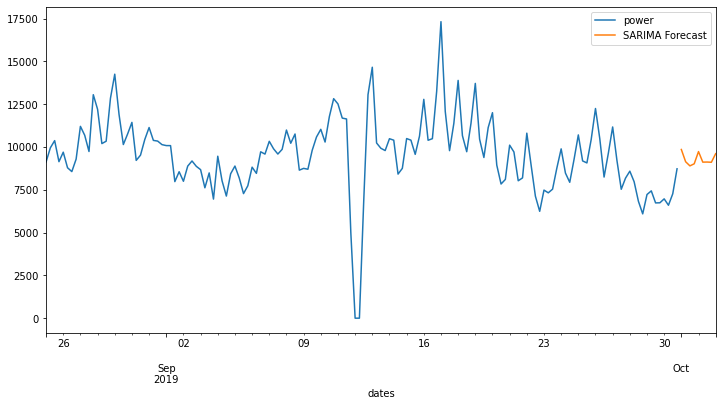

In [311]:
title='TOTAL POWER OF ALL AC,S---- 48 hours forecast'
ylabel='TOTAL DAILY POWER CONSUMPTION '
xlabel='DATES '

ax = main.plot(legend =True,figsize = (12,6))
ax.autoscale(axis='x',tight=True)
fcast.plot(legend = True)

In [312]:
pd.DataFrame(data = fcast.values, columns=['power values'])

power values
0   9855.408608
1   9139.829670
2   8897.614160
3   9019.044292
4   9733.521535
5   9116.026436
6   9121.873831
7   9108.767723
8   9611.271691